In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
!pip install finance-datareader

In [3]:
import FinanceDataReader as fdr

In [4]:
STOCK_CODE = '305720'#2차전지 

stock= fdr.DataReader(STOCK_CODE, '2020-05-03', '2021-08-06')
stock.reset_index(inplace = True)
#fdr.DataReader('F', '1980-01-01', '2019-12-30')

In [5]:
point=pd.read_csv('/content/drive/MyDrive/ETF/감성지수/2차전지 형태소.csv')
nlp_point = point[['2차전지 크롤링 결과', 'point']]
nlp_point['2차전지 크롤링 결과'] = nlp_point['2차전지 크롤링 결과'].str.replace('.', '-')
nlp_point.head()

,2차전지 크롤링 결과,point
0,2021-08-06,34
1,2021-08-06,19
2,2021-08-06,19
3,2021-08-05,14
4,2021-08-04,14


In [6]:
stock_point=nlp_point.groupby('2차전지 크롤링 결과').mean()
stock_point.reset_index(inplace = True)
stock_point.rename(columns = {'2차전지 크롤링 결과' : 'Date'},inplace = True )
stock_point['Date'] = pd.to_datetime( stock_point['Date'])
stock_point

,Date,point
0,2020-05-03,25.333333
1,2020-05-06,10.333333
2,2020-05-07,0.000000
3,2020-05-08,-2.500000
4,2020-05-11,8.000000
...,...,...
347,2021-08-02,27.000000
348,2021-08-03,30.500000
349,2021-08-04,14.000000
350,2021-08-05,14.000000


In [7]:
stock.head()

,Date,Open,High,Low,Close,Volume,Change
0,2020-05-04,7257,7372,7247,7297,113590,-0.021456
1,2020-05-06,7432,7432,7317,7397,139138,0.013704
2,2020-05-07,7387,7427,7337,7377,95901,-0.002704
3,2020-05-08,7402,7501,7402,7457,102475,0.010845
4,2020-05-11,7481,7506,7357,7382,121645,-0.010058


In [8]:
stock=pd.merge(stock, stock_point, on ='Date', how ='left' )
stock

,Date,Open,High,Low,Close,Volume,Change,point
0,2020-05-04,7257,7372,7247,7297,113590,-0.021456,NaN
1,2020-05-06,7432,7432,7317,7397,139138,0.013704,10.333333
2,2020-05-07,7387,7427,7337,7377,95901,-0.002704,0.000000
3,2020-05-08,7402,7501,7402,7457,102475,0.010845,-2.500000
4,2020-05-11,7481,7506,7357,7382,121645,-0.010058,8.000000
...,...,...,...,...,...,...,...,...
311,2021-08-02,20895,21015,20610,21015,1057597,0.005743,27.000000
312,2021-08-03,21060,21215,20745,20780,1552245,-0.011182,30.500000
313,2021-08-04,20780,20785,20245,20685,2096788,-0.004572,14.000000
314,2021-08-05,20645,21020,20570,20975,1241106,0.014020,14.000000


In [9]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 0 to 315
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    316 non-null    datetime64[ns]
 1   Open    316 non-null    int64         
 2   High    316 non-null    int64         
 3   Low     316 non-null    int64         
 4   Close   316 non-null    int64         
 5   Volume  316 non-null    int64         
 6   Change  316 non-null    float64       
 7   point   283 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 22.2 KB


In [10]:
stock['point'] = stock['point'].fillna(method='ffill')
stock

,Date,Open,High,Low,Close,Volume,Change,point
0,2020-05-04,7257,7372,7247,7297,113590,-0.021456,NaN
1,2020-05-06,7432,7432,7317,7397,139138,0.013704,10.333333
2,2020-05-07,7387,7427,7337,7377,95901,-0.002704,0.000000
3,2020-05-08,7402,7501,7402,7457,102475,0.010845,-2.500000
4,2020-05-11,7481,7506,7357,7382,121645,-0.010058,8.000000
...,...,...,...,...,...,...,...,...
311,2021-08-02,20895,21015,20610,21015,1057597,0.005743,27.000000
312,2021-08-03,21060,21215,20745,20780,1552245,-0.011182,30.500000
313,2021-08-04,20780,20785,20245,20685,2096788,-0.004572,14.000000
314,2021-08-05,20645,21020,20570,20975,1241106,0.014020,14.000000


In [11]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 0 to 315
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    316 non-null    datetime64[ns]
 1   Open    316 non-null    int64         
 2   High    316 non-null    int64         
 3   Low     316 non-null    int64         
 4   Close   316 non-null    int64         
 5   Volume  316 non-null    int64         
 6   Change  316 non-null    float64       
 7   point   315 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 22.2 KB


In [12]:
stock['point'][stock['point']> 50] = 50
stock['point'][stock['point']< -10] = -10

In [13]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 0 to 315
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    316 non-null    datetime64[ns]
 1   Open    316 non-null    int64         
 2   High    316 non-null    int64         
 3   Low     316 non-null    int64         
 4   Close   316 non-null    int64         
 5   Volume  316 non-null    int64         
 6   Change  316 non-null    float64       
 7   point   315 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 22.2 KB


In [14]:
stock.iloc[0, 7] = 0
stock.head()

,Date,Open,High,Low,Close,Volume,Change,point
0,2020-05-04,7257,7372,7247,7297,113590,-0.021456,0.000000
1,2020-05-06,7432,7432,7317,7397,139138,0.013704,10.333333
2,2020-05-07,7387,7427,7337,7377,95901,-0.002704,0.000000
3,2020-05-08,7402,7501,7402,7457,102475,0.010845,-2.500000
4,2020-05-11,7481,7506,7357,7382,121645,-0.010058,8.000000


Text(0, 0.5, 'price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


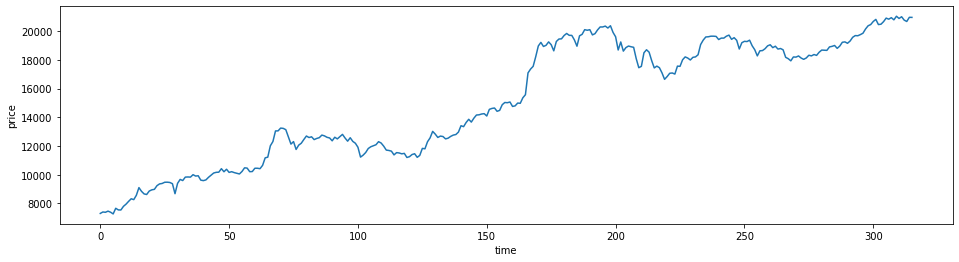

In [15]:
plt.figure(figsize=(16, 4))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

Text(0, 0.5, 'price')

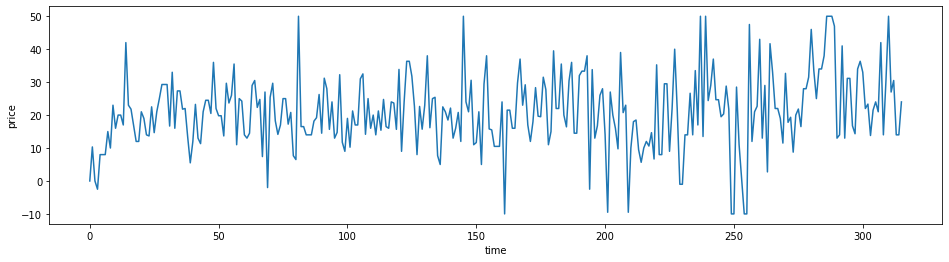

In [16]:
plt.figure(figsize=(16, 4))
sns.lineplot(y=stock['point'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume','point']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])

df = pd.DataFrame(scaled, columns=scale_cols)
df

,Open,High,Low,Close,Volume,point
0,0.008588,0.000722,0.008978,0.002466,0.001561,0.166667
1,0.021112,0.005053,0.014046,0.009719,0.003814,0.338889
2,0.017892,0.004692,0.015494,0.008269,0.000000,0.166667
3,0.018965,0.010034,0.020200,0.014071,0.000580,0.125000
4,0.024619,0.010395,0.016942,0.008631,0.002271,0.300000
...,...,...,...,...,...,...
311,0.984613,0.985563,0.976470,0.997461,0.084843,0.616667
312,0.996422,1.000000,0.986244,0.980416,0.128481,0.675000
313,0.976383,0.968960,0.950043,0.973526,0.176522,0.400000
314,0.966722,0.985924,0.973574,0.994560,0.101032,0.400000


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.30, random_state=0, shuffle=False)

In [20]:
x_train.shape, y_train.shape

((221, 5), (221,))

In [21]:
x_train

,Open,High,Low,Volume,point
0,0.008588,0.000722,0.008978,0.001561,0.166667
1,0.021112,0.005053,0.014046,0.003814,0.338889
2,0.017892,0.004692,0.015494,0.000000,0.166667
3,0.018965,0.010034,0.020200,0.000580,0.125000
4,0.024619,0.010395,0.016942,0.002271,0.300000
...,...,...,...,...,...
216,0.752380,0.757742,0.753475,0.118391,0.366667
217,0.712445,0.731538,0.721764,0.069353,0.343333
218,0.738496,0.728651,0.711266,0.098246,0.411111
219,0.720962,0.714935,0.687084,0.109101,0.277778


In [22]:
import tensorflow as tf

In [23]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [28]:
WINDOW_SIZE=30
BATCH_SIZE=30

In [29]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [30]:
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (30, 30, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (30, 1)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [32]:
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [33]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [34]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=100, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/100
7/7 [==============================] - 3s 109ms/step - loss: 0.1483 - mse: 0.2966 - val_loss: 0.3421 - val_mse: 0.6842

Epoch 00001: val_loss improved from inf to 0.34212, saving model to tmp/ckeckpointer.ckpt
Epoch 2/100
7/7 [==============================] - 0s 22ms/step - loss: 0.1230 - mse: 0.2460 - val_loss: 0.2908 - val_mse: 0.5815

Epoch 00002: val_loss improved from 0.34212 to 0.29076, saving model to tmp/ckeckpointer.ckpt
Epoch 3/100
7/7 [==============================] - 0s 24ms/step - loss: 0.1005 - mse: 0.2010 - val_loss: 0.2401 - val_mse: 0.4801

Epoch 00003: val_loss improved from 0.29076 to 0.24007, saving model to tmp/ckeckpointer.ckpt
Epoch 4/100
7/7 [==============================] - 0s 22ms/step - loss: 0.0800 - mse: 0.1600 - val_loss: 0.1884 - val_mse: 0.3768

Epoch 00004: val_loss improved from 0.24007 to 0.18839, saving model to tmp/ckeckpointer.ckpt
Epoch 5/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0591 - mse: 0.1182 - val_loss

In [35]:
model.load_weights(filename)

In [36]:
pred = model.predict(test_data)
pred.shape

(65, 1)

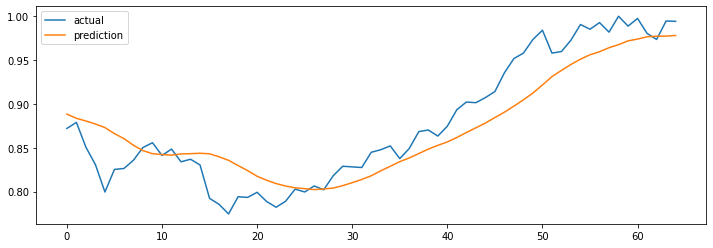

In [37]:
plt.figure(figsize=(12, 4))
plt.plot(np.asarray(y_test)[30:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()